# Particle Beams

This example describes all of the major capabilities of particle beams in OSCARS.  There are pre-defined particle types and the user is free to describe any other particle type they wish.  Non-zero beam widths can be defined using th emittance, beta functions, and lattice reference (point at which the beta functions are defined).  One can also define multiple particle beams in one OSCARS object and give weights to each.

Patricle beams can as well be defined, like other OSCARS objects, in any direction.  Although examples are often given where $+\hat z$ is the beam direction (mostly to align with accelerator nomenclature), there is no preferred direction in OSCARS.

The elements which you must define for a beam at a minimum are:
* type  (one of the predefined types, or 'custom')
* name  (any unique name you like)
* energy_GeV  (the energy in GeV)
* x0  (position where initial conditions are given)
* d0  (direction of beam at initial position)
* current  (the current in [A])

For a non-zero emittance beam you must additionally define the following (the beam shape is taken to be gaussian, though other distributions are possible):
* sigma_energy_GeV  (width in energy spread in [GeV])
* emittance  (the beam emittance in [m.rad] as [h, v])
* beta  (the beta function in [m] as [h, v])
* lattice_reference  (the reference point at which beta is defined)
* horizontal_direction  (the horizontal direction of the beam)

For a particle beam you can additionally define the following:
* rotations  (rotate the beam about x, then y, then z given as [$\theta_x, \theta_y, \theta_z$])
* translation  (translate the beam in x, y, z given as [x, y, z])
* t0  (time at the position x0 defined above, default is 0)
* weight  (for randome particle generation with multiple beams, default is 1)

Custom:  If you set type='custom' you will need to also define the following:
* mass (in [kg])
* charge (in [C])

In [1]:
# matplotlib plots inline
%matplotlib inline

# Import the OSCARS and helper modules
import OSCARS
from OSCARSPlotsMPL import *

OSCARS v1.31.03 - Open Source Code for Advanced Radiation Simulation
Brookhaven National Laboratory, Upton NY, USA
http://oscars.bnl.gov
oscars@bnl.gov


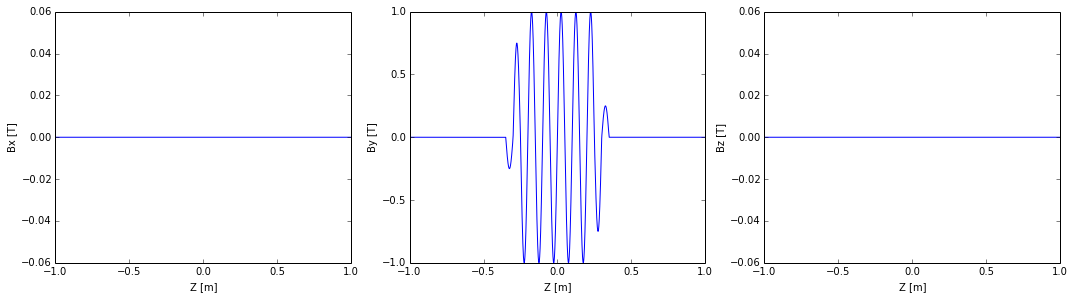

In [4]:
# Create an OSCARS object
osc = OSCARS.OSCARS()

# For these examples we will make use of a simple undulator field
osc.add_bfield_undulator(bfield=[0, 1, 0], period=[0, 0, 0.100], nperiods=5)

plot_bfield(osc)

## Basic  beams /  Particles

These are basic beams with zero emittance, one electron (NSLSII energy) and one proton (LHC energy)

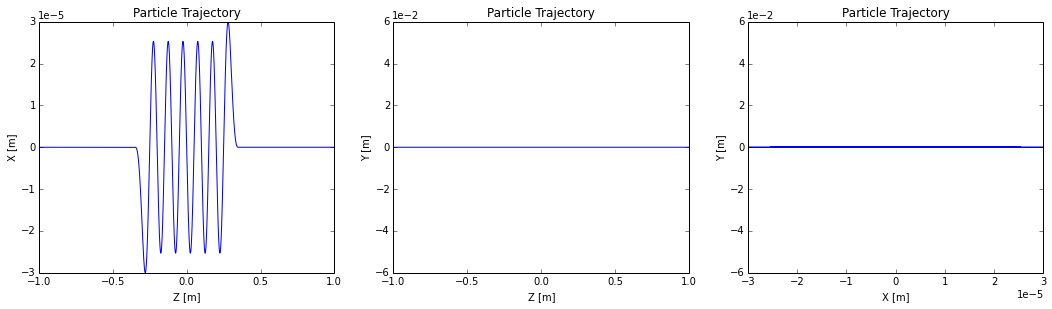

In [5]:
# Add a basic electron beam with zero emittance
osc.set_particle_beam(type='electron', name='beam_0', energy_GeV=3, x0=[0, 0, -1], d0=[0, 0, 1], current=0.500)

# You MUST set the start and stop time for the calculation
osc.set_ctstartstop(0, 2)

# Plot trajectory of beam
plot_trajectory_position(osc.calculate_trajectory())

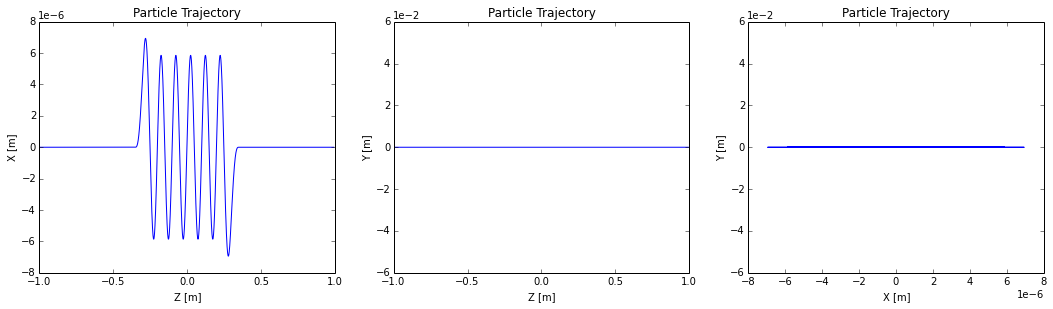

In [6]:
# Add a basic proton beam with zero emittance
osc.set_particle_beam(type='proton', name='beam_1', energy_GeV=13, x0=[0, 0, -1], d0=[0, 0, 1], current=0.500)

# You MUST set the start and stop time for the calculation
osc.set_ctstartstop(0, 2)

# Plot trajectory of beam
plot_trajectory_position(osc.calculate_trajectory())

## Multiple beams

This examples defined multiple beams in the same object, then plots the trajectory for two random particles selected from these beams.

Instead of using set_particle_beam we will use add_particle_beam (which is really the same thing, but set_particle_beam issues a clear_particle_beams() internally)

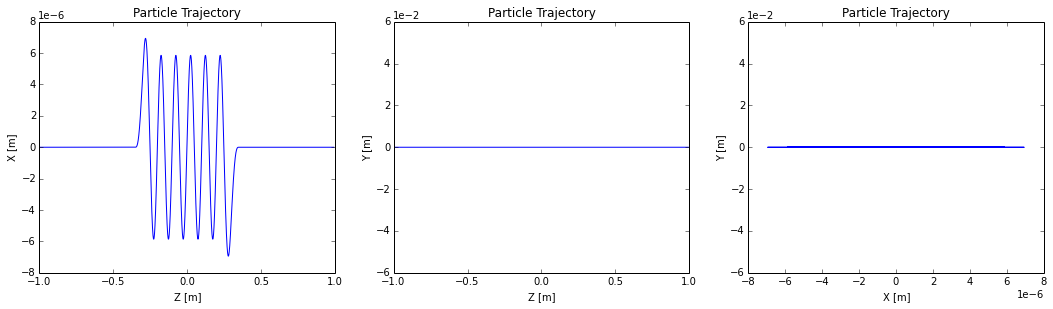

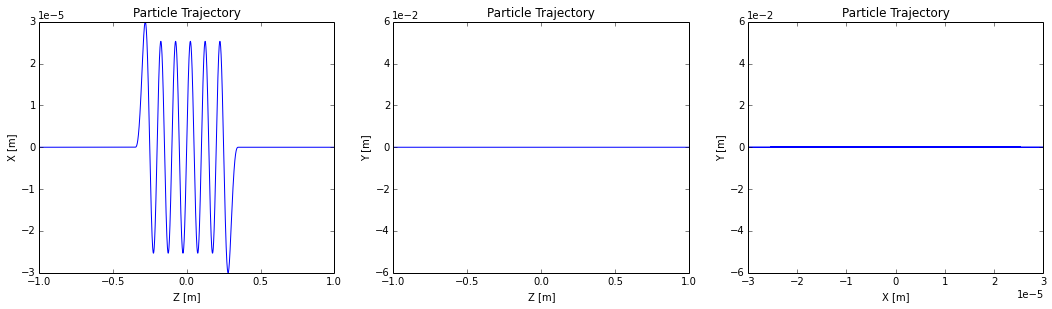

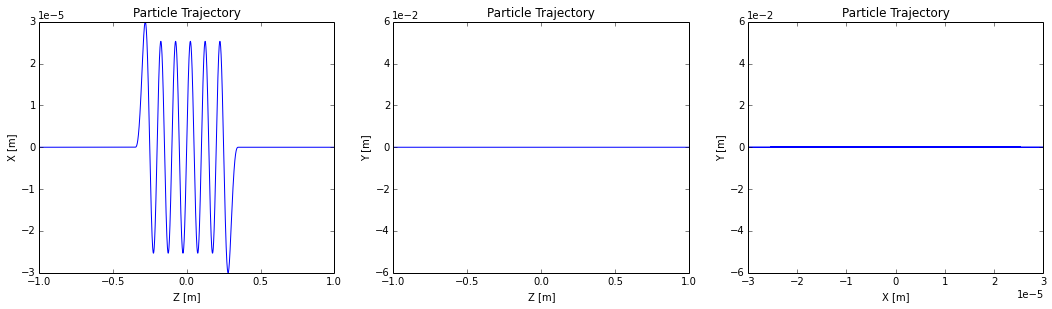

In [7]:
# Add basic electron beams with zero emittance
osc.clear_particle_beams()
osc.add_particle_beam(type='electron', name='beam_0', energy_GeV=3,  x0=[0, 0, -1], d0=[0, 0, 1], current=0.500)
osc.add_particle_beam(type='positron', name='beam_1', energy_GeV=3,  x0=[0, 0, -1], d0=[0, 0, 1], current=0.500)
osc.add_particle_beam(type='proton',   name='beam_2', energy_GeV=13, x0=[0, 0, -1], d0=[0, 0, 1], current=0.500)
osc.add_particle_beam(type='muon',     name='beam_3', energy_GeV=2,  x0=[0, 0, -1], d0=[0, 0, 1], current=0.500)
osc.add_particle_beam(type='pi+',      name='beam_4', energy_GeV=1,  x0=[0, 0, -1], d0=[0, 0, 1], current=0.500)

# You MUST set the start and stop time for the calculation
osc.set_ctstartstop(0, 2)

# Plot trajectory of beam
plot_trajectory_position(osc.calculate_trajectory())
osc.set_new_particle()
plot_trajectory_position(osc.calculate_trajectory())
osc.set_new_particle()
plot_trajectory_position(osc.calculate_trajectory())

# Beam with non-zero emittance

Below is an example of a beam with non-zero memittance.  We use the emittance and the beta function.  You must give the reference point for the beta function definition.

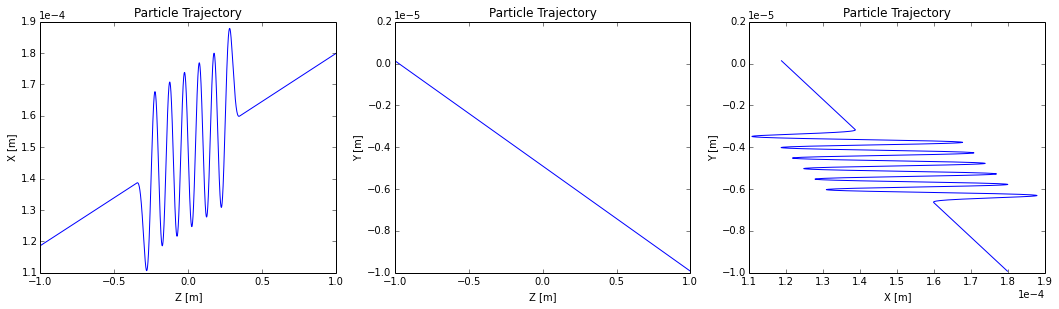

In [8]:
# Add a basic electron beam with zero emittance
osc.set_particle_beam(type='electron',
                      name='beam_0',
                      energy_GeV=3,
                      x0=[0, 0, -1],
                      d0=[0, 0, 1],
                      current=0.500,
                      sigma_energy_GeV=0.001*3,
                      beta=[1.5, 0.8],
                      emittance=[0.9e-9, 0.008e-9],
                      horizontal_direction=[1, 0, 0],
                      lattice_reference=[0, 0, 0])

# You MUST set the start and stop time for the calculation
osc.set_ctstartstop(0, 2)

# Plot trajectory of beam
osc.set_new_particle()
plot_trajectory_position(osc.calculate_trajectory())

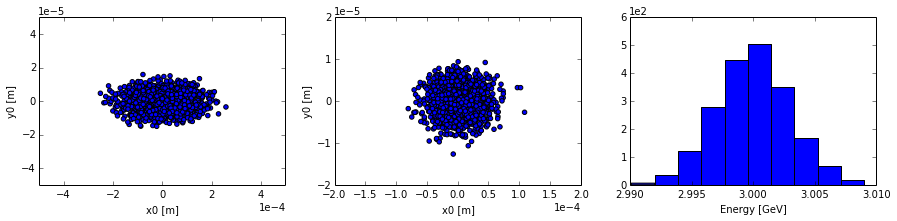

In [9]:
# Let's plot the distribution of particles at the initial position 'position'
energy = []
x = []
y = []
bx = []
by = []
for i in range(2000):
    osc.set_new_particle()
    energy.append(osc.get_particle_e0())
    position = osc.get_particle_x0()
    beta = osc.get_particle_beta0()

    x.append(position[0])
    y.append(position[1])

    bx.append(beta[0])
    by.append(beta[1])
    
plt.figure(1, figsize=[15, 3])

plt.subplot(131)
plt.scatter(x, y)
plt.xlim(-0.0005, 0.0005)
plt.ylim(-0.00005, 0.00005)
plt.xlabel('x0 [m]')
plt.ylabel('y0 [m]')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.subplot(132)
plt.scatter(bx, by)
plt.xlim(-0.0002, 0.0002)
plt.ylim(-0.00002, 0.00002)
plt.xlabel('x0 [m]')
plt.ylabel('y0 [m]')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.subplot(133)
plt.hist(energy)
plt.xlabel('Energy [GeV]')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


plt.show()

## Multiple beams with non-zero emittance

A simple example of 2 beams with different beam parameters in the same object

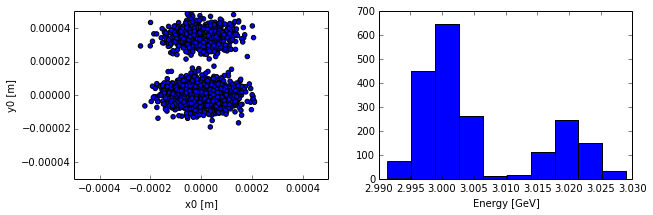

In [10]:
# Add basic electron beams with zero emittance
osc.clear_particle_beams()
osc.add_particle_beam(type='electron',
                      name='beam_0',
                      energy_GeV=3,
                      x0=[0, 0, -1],
                      d0=[0, 0, 1],
                      current=0.500,
                      sigma_energy_GeV=0.001*3,
                      beta=[1.5, 0.8],
                      emittance=[0.9e-9, 0.008e-9],
                      horizontal_direction=[1, 0, 0],
                      lattice_reference=[0, 0, 0],
                      weight=0.7)

osc.add_particle_beam(type='electron',
                      name='beam_1',
                      energy_GeV=3.02,
                      x0=[0, 0.000035, -1],
                      d0=[0, 0, 1],
                      current=0.500,
                      sigma_energy_GeV=0.001*3,
                      beta=[1.5, 0.8],
                      emittance=[0.9e-9, 0.008e-9],
                      horizontal_direction=[1, 0, 0],
                      lattice_reference=[0, 0, 0],
                      weight=0.3)


# You MUST set the start and stop time for the calculation
osc.set_ctstartstop(0, 2)

# And plot the results
energy = []
x = []
y = []
for i in range(2000):
    osc.set_new_particle()
    energy.append(osc.get_particle_e0())
    position = osc.get_particle_x0()

    x.append(position[0])
    y.append(position[1])
    
plt.figure(1, figsize=[10, 3])
plt.subplot(121)
plt.scatter(x, y)
plt.xlim(-0.0005, 0.0005)
plt.ylim(-0.00005, 0.00005)
plt.xlabel('x0 [m]')
plt.ylabel('y0 [m]')

plt.subplot(122)
plt.hist(energy)
plt.xlabel('Energy [GeV]')
plt.show()

## Custom Particles

This is an example of a custom particle in OSCARS.  All that additionally needs definition are the charge and mass

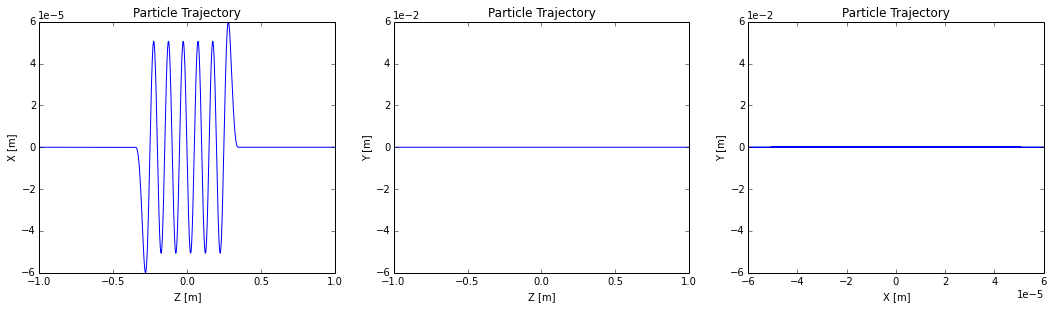

In [11]:
# Add a custom beam with zero emittance.
# This is for a particle with twice the chargs as the electron, but the same mass
osc.set_particle_beam(type='custom', name='beam_1', charge=-2*osc.qe(), mass=osc.me(), energy_GeV=3, x0=[0, 0, -1], d0=[0, 0, 1], current=0.500)

# You MUST set the start and stop time for the calculation
osc.set_ctstartstop(0, 2)

# Plot trajectory of beam
plot_trajectory_position(osc.calculate_trajectory())